In [1]:
import json
import gc
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from pandas import json_normalize #package for flattening json in pandas df

%matplotlib inline

In [2]:
df_dados = pd.read_csv('./app/data/pares.csv')
df_dados

,transicao_movimento,siglaTribunal,orgaoJulgador.codigoOrgao,count,min,max,median,C1,C2,C1-descricao,C2-descricao
0,1051.0 -> 1051.0,TJMG,3668.0,1,0.0,0.0,0.0,1051.0,1051.0,Decurso de Prazo,Decurso de Prazo
1,1051.0 -> 1051.0,TJMG,3786.0,1,209.0,209.0,209.0,1051.0,1051.0,Decurso de Prazo,Decurso de Prazo
2,1051.0 -> 1051.0,TJMG,3840.0,1,0.0,0.0,0.0,1051.0,1051.0,Decurso de Prazo,Decurso de Prazo
3,1051.0 -> 1051.0,TJMG,3867.0,1,15.0,15.0,15.0,1051.0,1051.0,Decurso de Prazo,Decurso de Prazo
4,1051.0 -> 1051.0,TJMG,3949.0,4,31.0,51.0,34.0,1051.0,1051.0,Decurso de Prazo,Decurso de Prazo
...,...,...,...,...,...,...,...,...,...,...,...
36343,nan -> 85.0,TJMG,3797.0,0,NaN,NaN,NaN,NaN,85.0,NaN,Petição
36344,nan -> 85.0,TJMG,4379.0,0,NaN,NaN,NaN,NaN,85.0,NaN,Petição
36345,nan -> 85.0,TJMG,5500.0,0,NaN,NaN,NaN,NaN,85.0,NaN,Petição
36346,nan -> 85.0,TJMG,5506.0,0,NaN,NaN,NaN,NaN,85.0,NaN,Petição


In [3]:
df_dados = df_dados.dropna()

In [4]:
#df_dados[df_dados['quant'] >= 10].sort_values('mediana')

In [6]:
filtro = df_dados['orgaoJulgador.codigoOrgao'] == 5760
df_g = df_dados[filtro][['C1','C2','count']]
df_g

,C1,C2,count
164,1051.0,11383.0,10
349,1051.0,123.0,4
452,1051.0,36.0,1
619,1051.0,493.0,149
857,1051.0,51.0,46
...,...,...,...
35521,981.0,36.0,1
35553,981.0,849.0,1
35687,981.0,982.0,61
35870,982.0,132.0,63


In [8]:
G = nx.DiGraph()
G = nx.convert_matrix.from_pandas_edgelist(df_g, 'C1', 'C2', ['count'])

<AxesSubplot:>

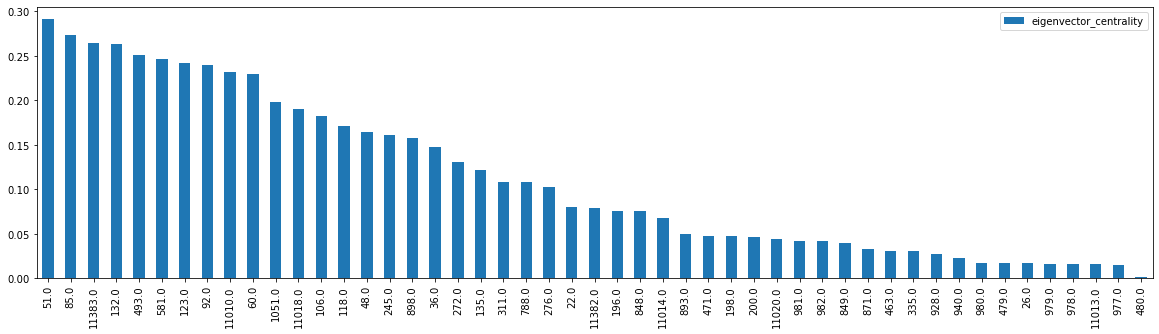

In [9]:
# Calculando os valores de centralidade
# http://www.leonidzhukov.net/hse/2014/socialnetworks/papers/Bonacich-Centrality.pdf

eigenvector_centrality=nx.eigenvector_centrality_numpy(G, weight='weight')

# Atribuindo os valores aos nós do grafo
nx.set_node_attributes(G, eigenvector_centrality, 'eigenvector_centr')

# Exibindo os valores em um gráfico de barras
df_importancia = pd.DataFrame([eigenvector_centrality], index=['eigenvector_centrality']).T
df_importancia.sort_values('eigenvector_centrality', ascending=False).head(50).plot.bar(figsize=(20,5))

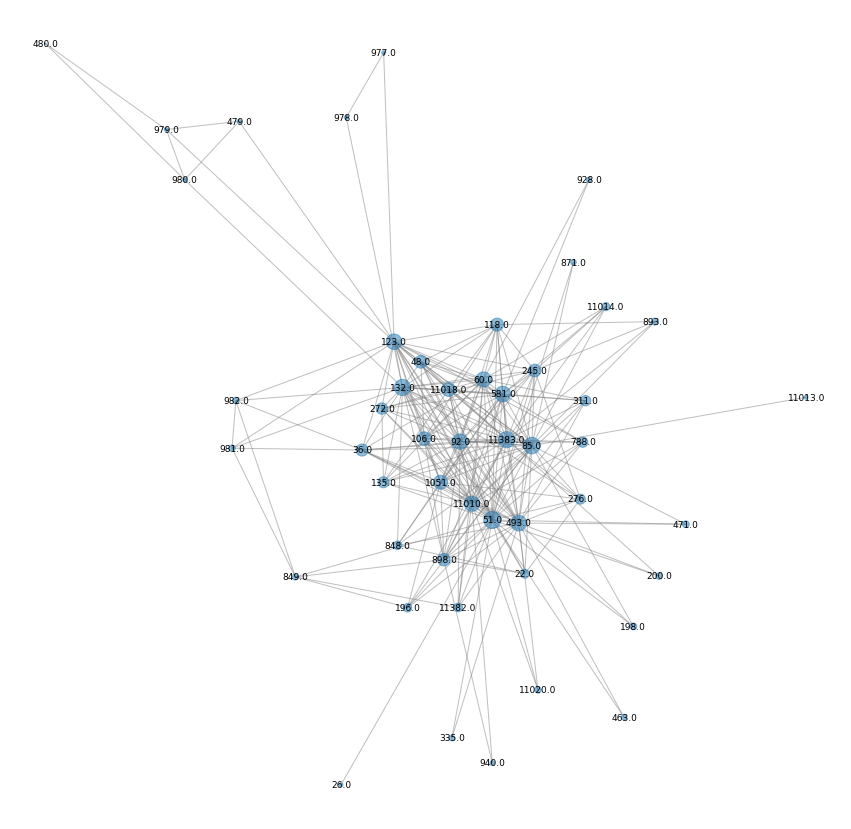

In [15]:
plt.figure(figsize=(15, 15))

node_sizes = [v * 1000 for v in eigenvector_centrality.values()]

# Define as posições para exibição dos nós
pos = nx.spring_layout(G)

# Desenha os rótulos (bairros)
nx.draw_networkx_labels(G, pos, font_size = 9)

# Desenha o restante do grafo
nx.draw(G, pos, node_size=node_sizes, alpha = 0.5, edge_color='grey')

In [16]:
G.nodes[12185]

KeyError: 12185

In [20]:
G.edges(22)

EdgeDataView([(22, 123.0), (22, 493.0), (22, 85.0), (22, 276.0), (22, 51.0), (22, 848.0), (22, 898.0)])